<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/13_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 단항 선형 회귀 실습
* 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# 파이썬 코드를 재실행해도 같은 결과가 나올 수 있도록 랜점시드를 설정
torch.manual_seed(10)

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


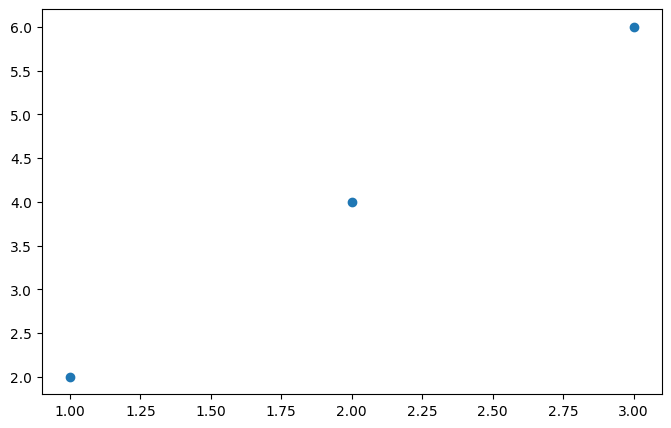

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

In [ ]:
# H = Wx + b

model = nn.Linear(1, 1)
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


In [ ]:
# 비용 함수
# Cost Function = Loss Function
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1181],
        [-0.2019],
        [-0.2858]], grad_fn=<AddmmBackward0>)


In [ ]:
((y_pred - y_train) ** 2).mean()

tensor(20.5513, grad_fn=<MeanBackward0>)

In [ ]:
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(20.5513, grad_fn=<MseLossBackward0>)

In [ ]:
# 데이터 [[1], [2], [3]]
# W: [[-0.0838]] b: [-0.0343]
# pred: [[-0.1181], [-0.2019], [-0.2858]]
print(-0.0838*1+-0.0343)
print(-0.0838*2+-0.0343)
print(-0.0838*3+-0.0343)

-0.1181
-0.2019
-0.2857


### 경사하강법(Gradient Descent)
* 비용 함수의 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저 알고리즘이라고 함
* 최적화 알고리즘
* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 학습이라고 부름
* 경사 하강법을 가장 기본적인 옵티마이저 알고리즘
![](https://i.imgur.com/0fW4LTG.png)

In [ ]:
# 학습률(Learning rate): 한 번 움직이는 거리(increment step)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
loss = nn.MSELoss()(y_pred, y_train)

# gradient를 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward()
# W와 b를 업데이트
optimizer.step()

print(list(model.parameters()))
# W: [[-0.0838]] b: [-0.0343]
# W: [[0.1120]] b: [0.0498]

[Parameter containing:
tensor([[0.1120]], requires_grad=True), Parameter containing:
tensor([0.0498], requires_grad=True)]


In [ ]:
# 학습(Training)
# 반복 훈련을 하면서 틀린 W, b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 16.260735
Epoch 100/100 Loss: 0.048222
Epoch 200/200 Loss: 0.029798
Epoch 300/300 Loss: 0.018414
Epoch 400/400 Loss: 0.011378
Epoch 500/500 Loss: 0.007031
Epoch 600/600 Loss: 0.004345
Epoch 700/700 Loss: 0.002685
Epoch 800/800 Loss: 0.001659
Epoch 900/900 Loss: 0.001025
Epoch 1000/1000 Loss: 0.000634


In [ ]:
print(list(model.parameters()))
# 1.9708 * x + 0.0663

[Parameter containing:
tensor([[1.9708]], requires_grad=True), Parameter containing:
tensor([0.0663], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[10], [12.1234]])
y_pred = model(x_test)
print(y_pred)

tensor([[19.7747],
        [23.9595]], grad_fn=<AddmmBackward0>)


# 2. 다중 선형 회귀
* 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
torch.Size([5, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])
torch.Size([5, 1])


In [ ]:
# H = W1x1 + W3x3 + b
model = nn.Linear(3, 1)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2165,  0.1328, -0.3303]], requires_grad=True), Parameter containing:
tensor([-0.1018], requires_grad=True)]


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 43266.148438
Epoch 100/100 Loss: 4.803024
Epoch 200/200 Loss: 4.560738
Epoch 300/300 Loss: 4.331190
Epoch 400/400 Loss: 4.113773
Epoch 500/500 Loss: 3.907800
Epoch 600/600 Loss: 3.712666
Epoch 700/700 Loss: 3.527837
Epoch 800/800 Loss: 3.352756
Epoch 900/900 Loss: 3.186870
Epoch 1000/1000 Loss: 3.029752


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.6800, 0.8300, 0.5040]], requires_grad=True), Parameter containing:
tensor([-0.0911], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[82, 92, 82]])
y_pred = model(x_test)
print(y_pred)

tensor([[173.3595]], grad_fn=<AddmmBackward0>)


### 문제
temps에서 데이터에서 기온에 따른 지면 온도를 예측해보자.

In [ ]:
import pandas as pd

In [ ]:
temps_df = pd.read_csv('/content/drive/MyDrive/KDT/4. 머신러닝과 딥러닝/temps.csv', encoding='euc-kr')

In [ ]:
temps_df.info()

NameError: ignored

In [ ]:
temps_df.dropna(inplace=True)

In [ ]:
temps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8779 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8779 non-null   int64  
 1   지점명       8779 non-null   object 
 2   일시        8779 non-null   object 
 3   기온(°C)    8779 non-null   float64
 4   지면온도(°C)  8779 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 411.5+ KB


In [ ]:
temps_df_x = temps_df['기온(°C)'].values
temps_df_y = temps_df['지면온도(°C)'].values

In [ ]:
x_np_temps = []
y_np_temps = []

for x, y in zip(temps_df_x, temps_df_y):
    x_np_temps.append([x])
    y_np_temps.append([y])

In [ ]:
x_temps = torch.FloatTensor(x_np_temps)
y_temps = torch.FloatTensor(y_np_temps)

In [ ]:
x_temps

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]])

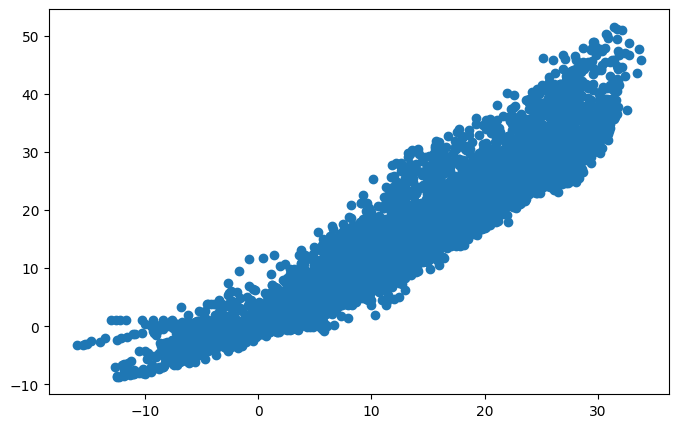

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(x_temps, y_temps)

In [ ]:
model = nn.Linear(1, 1)

In [ ]:
y_pred = model(x_temps)

In [ ]:
loss = nn.MSELoss()(y_pred, y_temps)
loss

tensor(20.8162, grad_fn=<MseLossBackward0>)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_temps)
    loss = nn.MSELoss()(y_pred, y_temps)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 20.816181
Epoch 100/100 Loss: 20.816181
Epoch 200/200 Loss: 20.816181
Epoch 300/300 Loss: 20.816181
Epoch 400/400 Loss: 20.816181
Epoch 500/500 Loss: 20.816181
Epoch 600/600 Loss: 20.816181
Epoch 700/700 Loss: 20.816181
Epoch 800/800 Loss: 20.816181
Epoch 900/900 Loss: 20.816181
Epoch 1000/1000 Loss: 20.816181


In [ ]:
x_test = torch.FloatTensor([[12.1234]])
y_pred = model(x_test)
print(y_pred)

tensor([[11.6387]], grad_fn=<AddmmBackward0>)


### 강사님 풀이

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KDT/4. 머신러닝과 딥러닝/temps.csv', encoding='euc-kr')
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [ ]:
df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      3
지면온도(°C)    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      0
지면온도(°C)    0
dtype: int64

In [ ]:
x_data = df[['기온(°C)']]
y_data = df[['지면온도(°C)']]

x_data = torch.FloatTensor(x_data.values)
y_data = torch.FloatTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([8779, 1])
torch.Size([8779, 1])


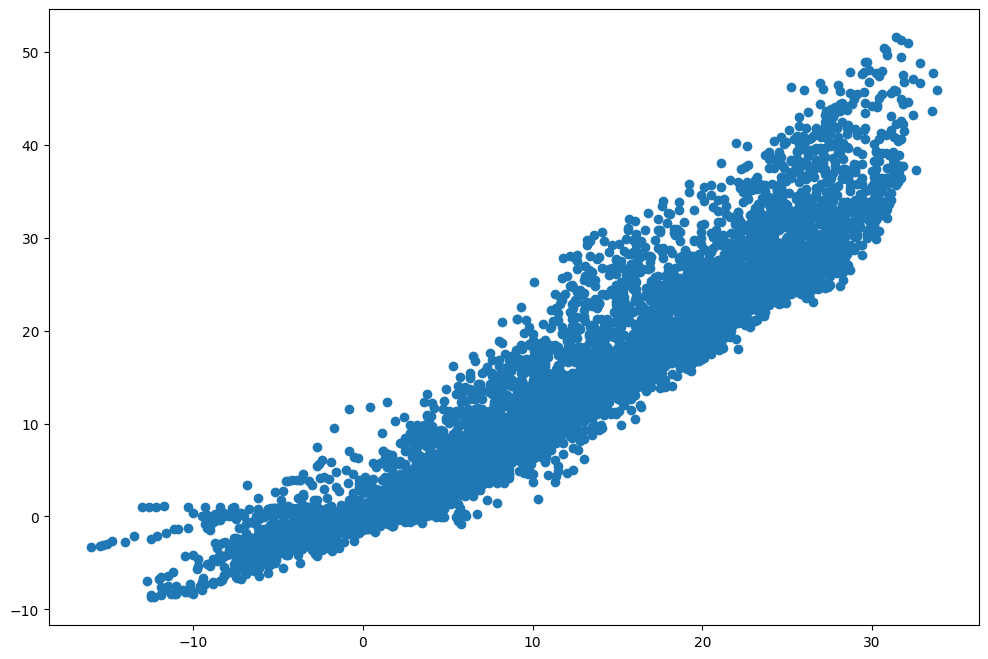

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x_data, y_data)

In [ ]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7470]], requires_grad=True), Parameter containing:
tensor([-0.5640], requires_grad=True)]


In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_data)
    loss = nn.MSELoss()(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 55.169590
Epoch 100/100 Loss: 13.599600
Epoch 200/200 Loss: 13.503249
Epoch 300/300 Loss: 13.421331
Epoch 400/400 Loss: 13.351684
Epoch 500/500 Loss: 13.292469
Epoch 600/600 Loss: 13.242125
Epoch 700/700 Loss: 13.199323
Epoch 800/800 Loss: 13.162930
Epoch 900/900 Loss: 13.131990
Epoch 1000/1000 Loss: 13.105685


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.1148]], requires_grad=True), Parameter containing:
tensor([0.2144], requires_grad=True)]


In [ ]:
y_pred = model(x_data).detach().numpy() # 저장 후 numpy로 변환
y_pred

array([[ -9.484523 ],
       [ -7.9237795],
       [ -7.2548885],
       ...,
       [ -7.9237795],
       [ -9.818968 ],
       [-10.041931 ]], dtype=float32)

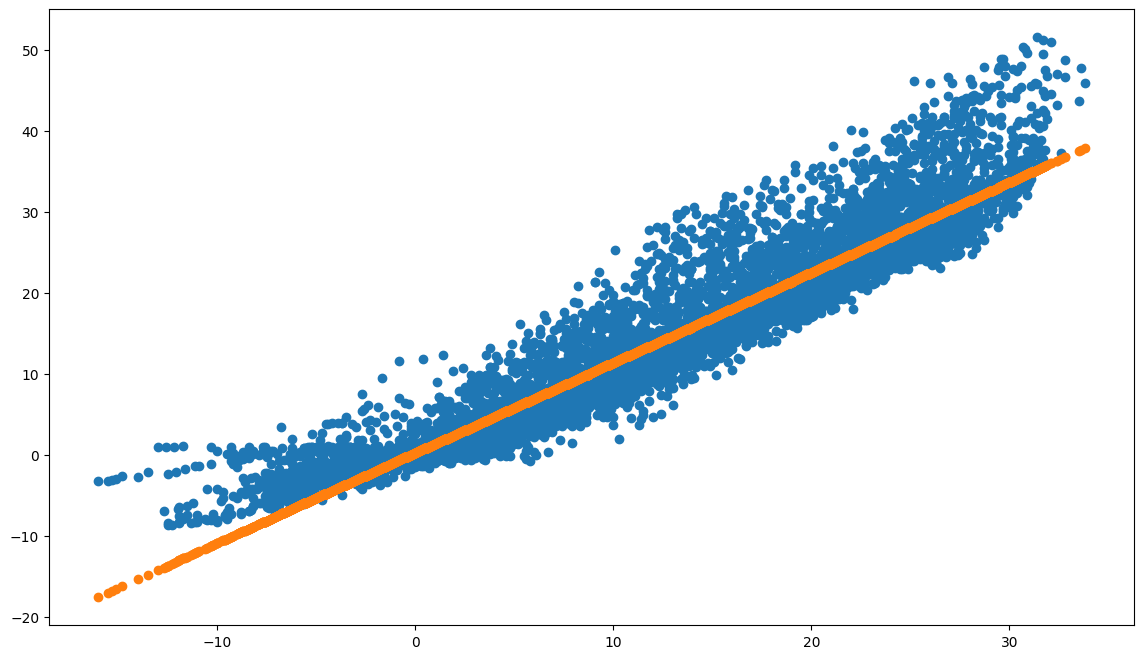

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred)